# K-Nearest Neighbor

#### KNN
- K-Nearest Neighbor : 가장 가까운 이웃 k개
- 학습용 데이터에서 k개의 최근접 이웃의 값을 찾아 그 값들로 새로운 값을 예측
- **회귀**와 **분류**에 사용됨
- 연산 속도가 느림

<div style="text-align:center;">
    <img src="https://i.ibb.co/fvqzV3Q/knn03.png" width=50%>
</div>

사진 출처 : https://hleecaster.com/ml-knn-concept/

#### k값의 중요성
- k에 따라 데이터를 다르게 예측
- 따라서 **적절한 k** 값을 찾는 것이 중요(default=5)
- 일반적으로
    - k를 1로 설정 x -> 너무 편향됨
    - k를 홀수로 설정 -> 짝수인 경우 과반수 이상이 나오지 않을 수 있음

#### Scaling
- Scaling 여부에 따라 KNN 모델 성능이 달라진다는 것을 주의
- Scaling 하지 않았을 때 산점도를 찍어보았을 때 눈에 보이는게 다가 아님

**Normalization**
- 각 변수의 값이 0과 1 사이 값이 됨
<br>$ X_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $</br>

**Standardization**
- 각 변수의 평균이 0, 표준편차가 1이 됨
<br>$ X_z = \frac{x - x{mean}}{x_{std}} $</br>
- **평가용 데이터에도 학습용 데이터를 기준으로 스케일링 수행 해야함**

#### 실습

- AirQuality 데이터에 대해 모델링

**1. 환경 준비**

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

**2. 데이터 이해**

In [3]:
# 상위 5개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 하위 5개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [5]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


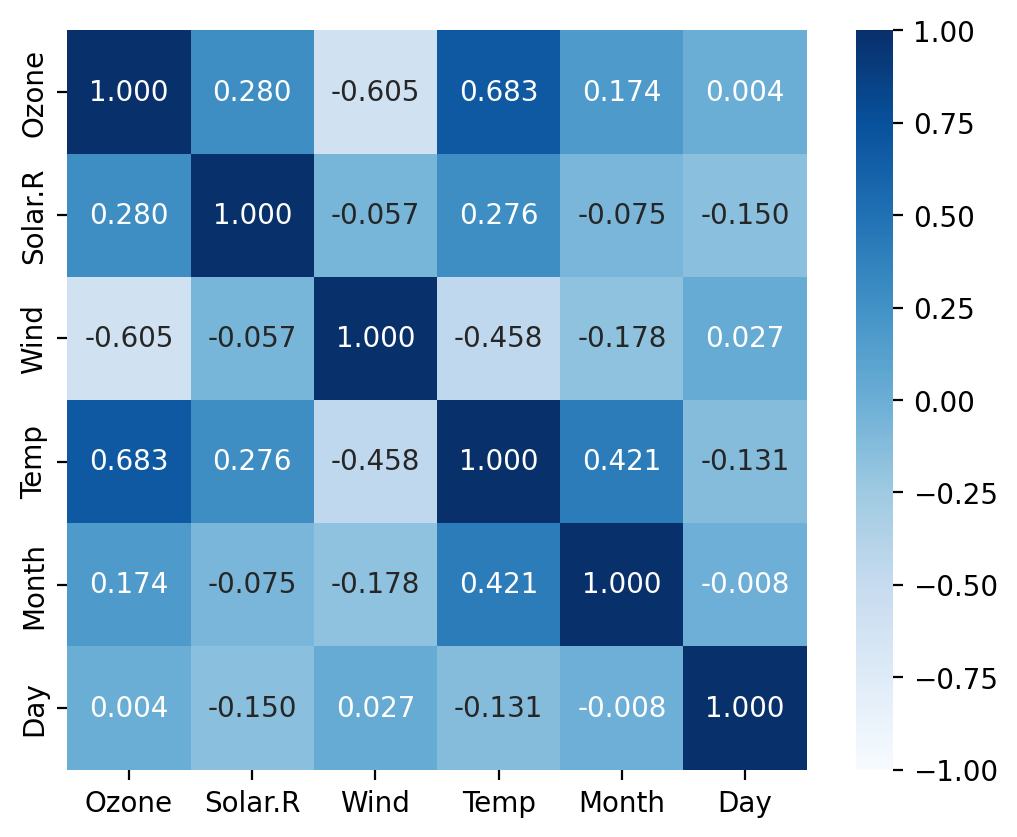

In [7]:
# 상관관계 heatmap으로 확인
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

**3. 데이터 준비**

**1) 결측치 처리**

In [8]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [9]:
# 결측치 채우기
data.interpolate(method='linear', inplace=True)

# 확인
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

In [10]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


**3) x, y 분리**

In [11]:
# target 확인
target = 'Ozone'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 학습용, 평가용 데이터 분리**

In [12]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**5) Normalization**

- 방법 1 : 공식 사용

In [13]:
# 최댓값, 최솟값 구하기
x_max = x_train.max()
x_min = x_train.min()

# 정규화
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min)

- 방법 2 : 함수 사용

In [14]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**4. 모델링**

In [15]:
# 1. 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# 2. 선언하기
model = KNeighborsRegressor()

In [18]:
# 3. 학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [19]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [20]:
# 5. 평가하기
print('mae:', mean_absolute_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

mae: 12.443478260869565
r2_score: 0.6168024614834005


**5. 시각화**

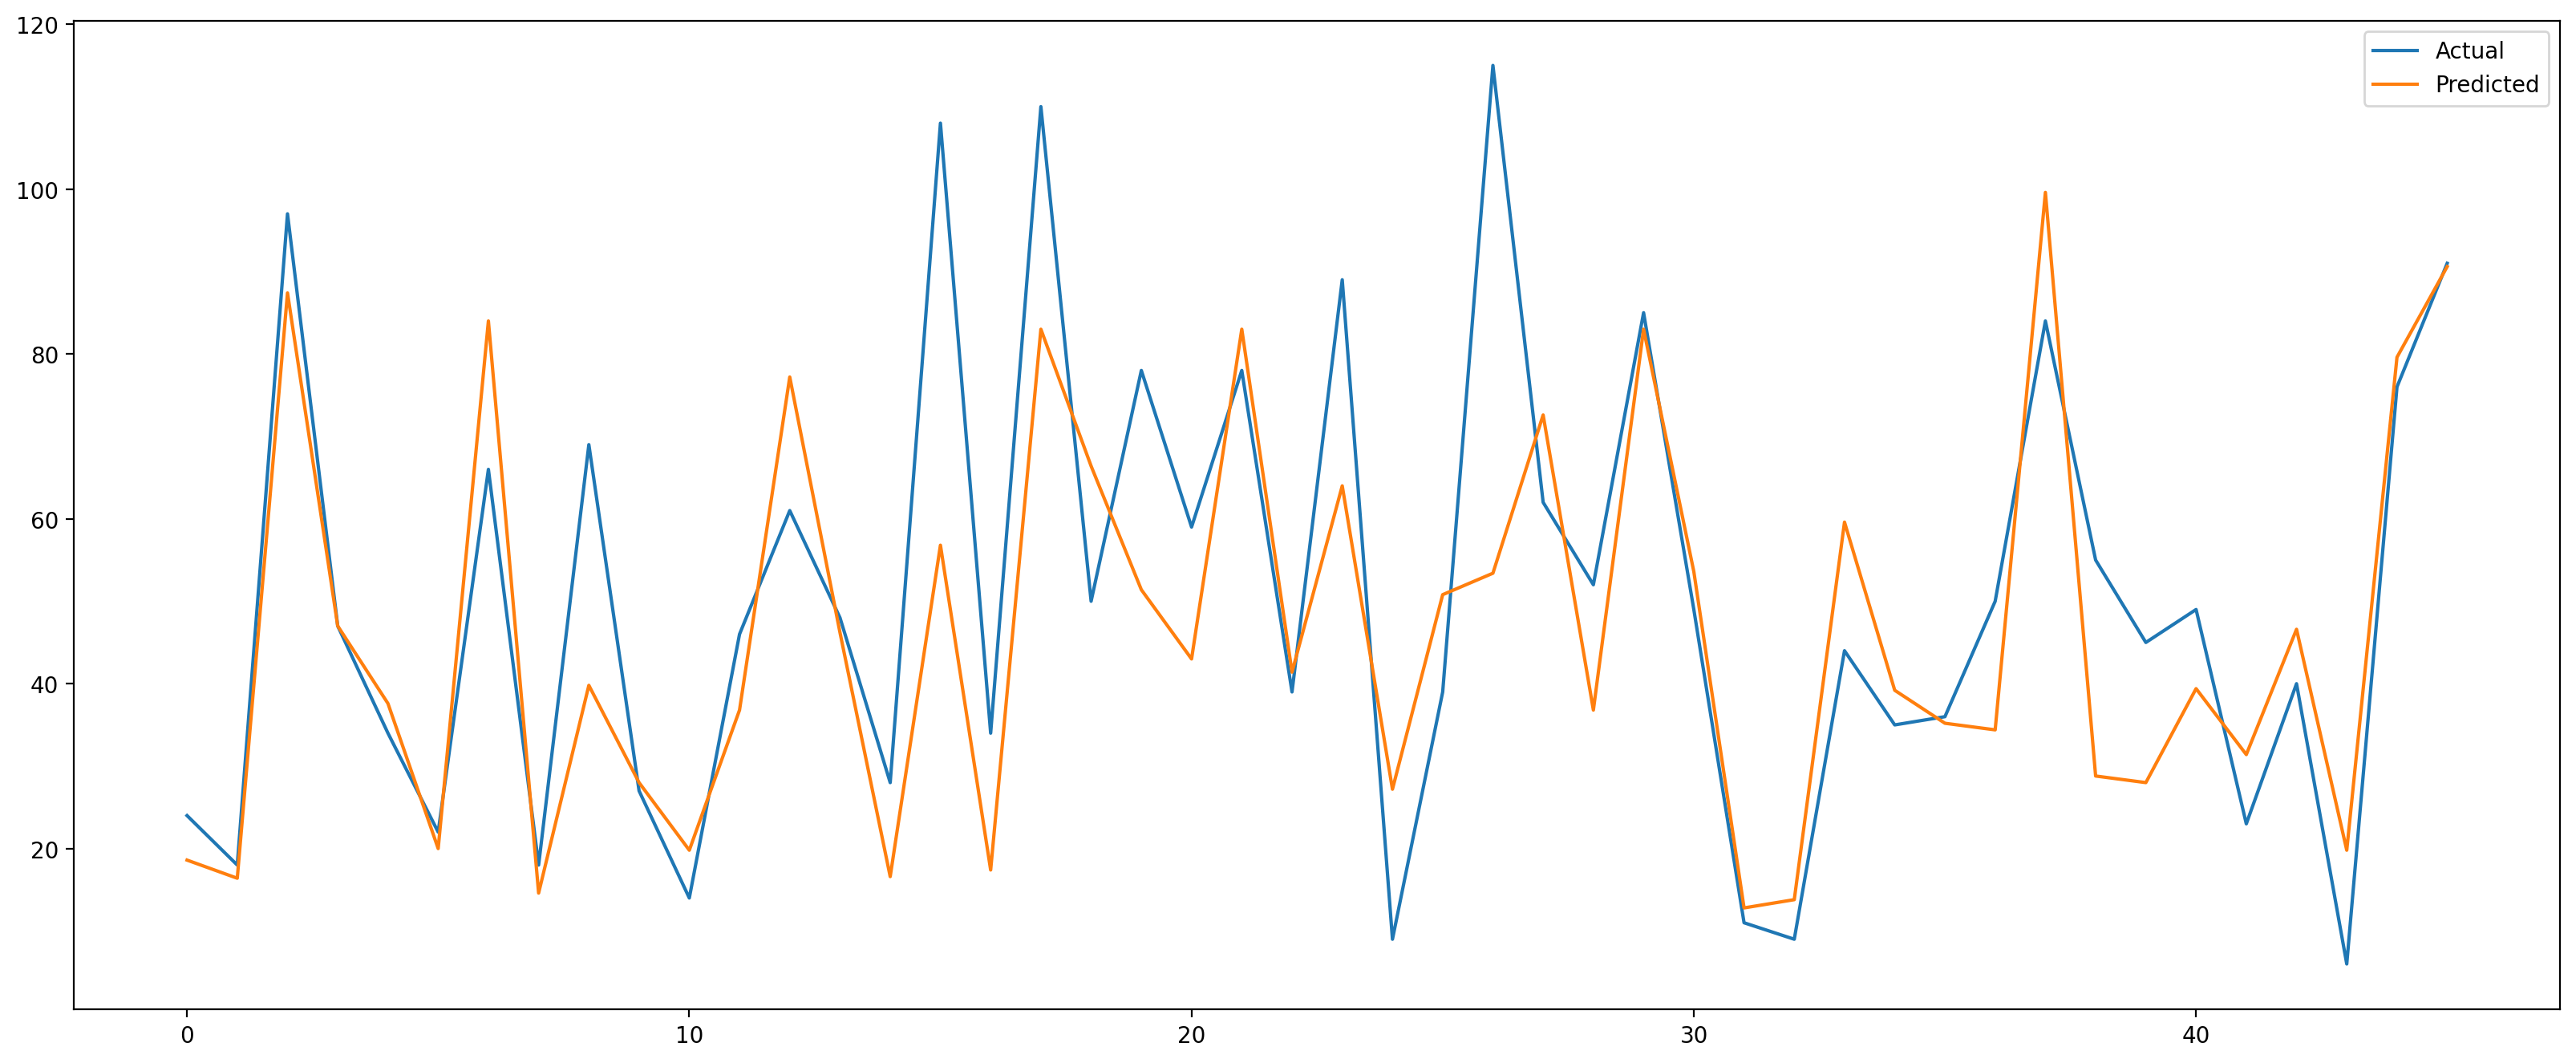

In [21]:
# 예측값, 실제값 시각화
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()